# Brain motor Activity (during Hand MVT) & BBT Score

Analyse sur 22 sujets (40-60 qui ont fait la tache MAIN en IRMf)
Analyse sur tous les voxels de la region motrice (Mask)

Regression avec deux méthodes: 
    
  - GraphNet (rapide  ,mais carte de résultats moins claire)
    
  - TV-L1 (long ,  mais cartes plus claires - résultats facilement interpretables)
  

Regressions effectuées (avec GraphNet pour la majorité vu la durée de TV-L1):
- IRM Mouvements de la Main VS Score moyen BBT
- IRM Imagination BBT VS Score moyen BBT
- IRM Imagination Main VS Score delta TUG (absolu)
- IRM Imagination Tout VS Score delta TUG (absolu)


In [5]:
%matplotlib inline

import numpy as np
from nilearn.input_data import NiftiLabelsMasker
from nilearn.datasets import load_mni152_brain_mask
from nilearn import datasets
import nibabel as nib
import nibabel as nib 
from nilearn.plotting import find_xyz_cut_coords
from nilearn.image import math_img
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from sklearn.externals.joblib import Memory

import warnings

  
    
import matplotlib.pyplot as plt
def plot_pred(true_value,y_pred, mse):
    ind=np.argsort(true_value)
    true_vs=true_value[ind]
    y_pred_s=y_pred[ind]
    plt.figure()
    plt.suptitle("graph-net: Mean Absolute Error %.2f" % mse)
    linewidth = 3
    ax1 = plt.subplot('211')
    ax1.plot(true_vs, label="True value", linewidth=linewidth)
    ax1.plot(y_pred_s, '--', c="g", label="Predicted value", linewidth=linewidth)
    ax1.set_ylabel("value")
    plt.legend(loc="best")
    ax2 = plt.subplot("212")
    ax2.plot(true_vs - y_pred_s, label="True value - predicted",
         linewidth=linewidth)
    ax2.set_xlabel("subject")
    plt.legend(loc="best")
    plt.show()

In [6]:

# Prepare ploting
basc = datasets.fetch_atlas_basc_multiscale_2015(version='asym')['scale444']
brainmask = load_mni152_brain_mask()
masker = NiftiLabelsMasker(labels_img = basc, mask_img = brainmask, 
                           memory_level=1, verbose=0,
                           detrend=True, standardize=False,  
                           high_pass=0.01,t_r=2.28,
                           resampling_target='labels'
                           )
masker.fit()



C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\scipy\ndimage\interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


NiftiLabelsMasker(background_label=0, detrend=True, high_pass=0.01,
         labels_img='C:\\Users\\mmenoret/nilearn_data\\basc_multiscale_2015\\template_cambridge_basc_multiscale_nii_asym\\template_cambridge_basc_multiscale_asym_scale444.nii.gz',
         low_pass=None,
         mask_img=<nibabel.nifti1.Nifti1Image object at 0x000000000A990710>,
         memory=Memory(cachedir=None), memory_level=1,
         resampling_target='labels', sessions=None, smoothing_fwhm=None,
         standardize=False, t_r=2.28, verbose=0)

In [7]:
fold_g='F:/IRM_Marche/'
blocks=np.loadtxt(fold_g+'block_main.txt','int')
label=np.loadtxt(fold_g+'label_main.txt','S12')
mask_block=blocks==blocks
for x in range(label.shape[0]):
    if label[x,0]!=label[x-1,0]:
        mask_block[x]=False
    elif label[x,0]!=label[x-2,0]:
        mask_block[x]=False
        
mboug_mask=label[:,2]== b'mboug'  
mimag_mask=label[:,2]== b'mimag' 
imag_mask=label[:,0]== b'imag'  
pimag_mask=label[:,2]== b'pimag'  
final_mask= np.logical_and(mboug_mask,mask_block)
final_mask_mimag= np.logical_and(mimag_mask,mask_block)
final_mask_imag= np.logical_and(imag_mask,mask_block)
final_mask_pimag= np.logical_and(pimag_mask,mask_block)

In [8]:
import os
from nilearn.image import index_img, mean_img
smt='ss'
suj_filenames=[]
suj_filenames_mimag=[]
suj_filenames_imag=[]
suj_filenames_pimag=[]
names={'ap':'ALLAIN',
       'as':'ANDRE',
       'bh':'BEAUGE',       
       'bi':'BROCHARD',
       'boh':'BOUMARD',
       'cas':'CASINTHIE',
       'cb':'CHOLOUX',
       'cmp':'CAPERAN',
       'cs':'CHOIMET',
       'gbn':'GOURDONBELLARD',
       'gm':'GAUTIER',
       'gn':'GAUTIERNATH',
       'mv':'MAROT',
       'ms':'MICHEL',
       'pm':'PAILLEY',
       'pc':'PAPON',
       'ph':'PESNEL',
       'pa':'PETIT',
       'pv':'PIC',
       'pom':'PONTIE',
       'rdc':'RODRIGUEZDIAZ',
       'ti':'TESSON',
       'vs':'VANWATERLOO',
       }


for i,(n,foldn) in enumerate(sorted(names.items())):
    suj_filename=os.path.join(fold_g,'Temoins_40_60ans',foldn,'Suj','Functional','all_'+smt+'_'+n+'.nii.gz')
    suj_data= index_img(suj_filename, final_mask)
    suj_mean= mean_img(suj_data)
    suj_filenames.append(suj_mean)
    
    suj_data_mimag= index_img(suj_filename, final_mask_mimag)  
    suj_mean_mimag= mean_img(suj_data_mimag)
    suj_filenames_mimag.append(suj_mean_mimag)
    
    suj_data_pimag= index_img(suj_filename, final_mask_pimag)
    suj_mean_pimag= mean_img(suj_data_pimag)
    suj_filenames_pimag.append(suj_mean_pimag)
    
    suj_data_imag= index_img(suj_filename, final_mask_imag)
    suj_mean_imag= mean_img(suj_data_imag)
    suj_filenames_imag.append(suj_mean_imag)

    #print(n)
    


In [9]:
suj_sex=np.array((1,2,1,2,2,1,2,2,1,2,2,2,2,2,1,2,1,2,1,2,2,2,1))
suj_age=np.array((51,52,60,43,45,53,57,42,43,54,59,50,56,46,44,48,58,54,49,57,41,59,45))
suj_bbt_md=np.array((63,77,56,77,60,67,55,73,66,64,69,68,64,61,64,68,60,70,59,65,52,59,53))
suj_bbt=np.array((63,73.5,55.5,76,58,68,56,75,72,63.5,66,69.5,65,59.5,69,69.5,60,66.5,60.5,66.5,52.5,57,52))
#suj_bbt=np.array((63,73.5,55.5,76,68,56,75,72,63.5,66,69.5,65,59.5,69,69.5,60,66.5,60.5,66.5,52.5,57,52))


suj_adtug=np.array((31.69,12.32,18.05,33.21,13.08,45.57,21.45,27.58,39.12,69.85,24.52,3.60,26.04,11.19,27.36,
                    40.20,26.07,73.71,39.93,20.73,36.23,62.32,29.11))

suj_dtug=np.array((31.69,12.32,-18.05,33.21,13.08,45.57,21.45,27.58,39.12,69.85,24.52,-3.60,26.04,-11.19,27.36,
                   40.20,26.07,73.71,39.93,-20.73,36.23,62.32,29.11))
suj_tugima=np.array((4.78,5.94,11.6,3.49,6.93,4.44,4.62,6.44,4.01,3.27,5.51,5.37,4.91,9.53,6.12,4.77,4.57,2.99,
                     4.27,8.73,5.56,3.06,4.99))
suj_tugrea=np.array((6.58,6.72,9.68,4.88,7.9,7.06,5.73,8.5,5.96,6.78,7.05,5.18,6.38,8.52,8.06,7.17,5.94,6.48,
                     6.4,7.09,8.02,5.83,6.69))
suj_cad=np.array((100.6,106.60,99.8,120.3,109.1,99.4,119.3,115.2,97.50,106.8,128.3,129.4,117.0,105.5,121.0,126.2,110.1,
          128.5,98.8,115.2,98.4,127.0,115.4))


In [10]:
mask='F:/IRM_Marche/ICAMask.nii.gz'
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(
        mask_img=mask, memory_level=1,
        detrend=True,t_r=2.28,high_pass=0.01)
masker = masker.fit()

## Regression IRM mvt main & score BBT moyen (TV-L1)

In [11]:
from nilearn.decoding import SpaceNetRegressor
from sklearn.model_selection import cross_val_predict
decoder = SpaceNetRegressor(mask=mask, penalty="tv-l1",#"tv-l1"
                            alphas=1,  # prefer large alphas
                            memory="nilearn_cache")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y_pred = cross_val_predict(decoder, suj_filenames, suj_bbt, cv=5)
    decoder.fit(suj_filenames, suj_bbt)

C:\Users\mmenoret\Miniconda2\envs\fmri_3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(53, 63, 52, 18),
affine=array([[  -3.,    0.,    0.,   78.],
       [   0.,    3.,    0., -112.],
       [   0.,    0.,    3.,  -70.],
       [   0.,    0.,    0.,    1.]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min finished


Time Elapsed: 172.779 seconds, 2 minutes.
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(53, 63, 52, 5),
affine=array([[  -3.,    0.,    0.,   78.],
       [   0.,    3.,    0., -112.],
       [   0.,    0.,    3.,  -70.],
       [   0.,    0.,    0.,    1.]])
)
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


Time Elapsed: 93.0783 seconds, 1 minutes.
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


Time Elapsed: 112.545 seconds, 1 minutes.
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished


Time Elapsed: 128.216 seconds, 2 minutes.
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


Time Elapsed: 134.534 seconds, 2 minutes.
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min finished


Time Elapsed: 114.966 seconds, 1 minutes.


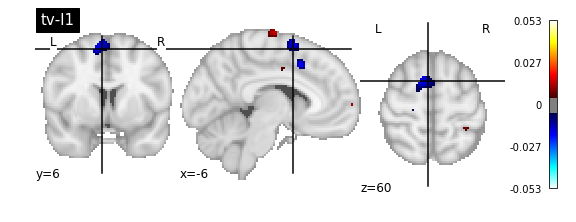

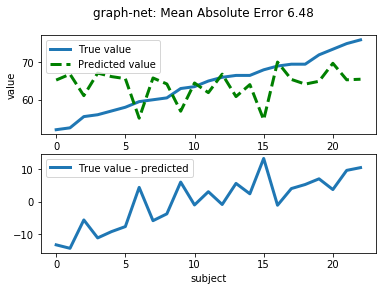

0.0933418709257 0.671846703447


In [12]:
from nilearn.plotting import plot_stat_map, show
from scipy import stats
plot_stat_map(decoder.coef_img_, title="tv-l1", cut_coords=[-6, 6, 60],threshold=0.005)
y_pred=y_pred.ravel()
mse = np.mean(np.abs(suj_bbt - y_pred))
plot_pred(suj_bbt,y_pred, mse)

score,p=stats.pearsonr(suj_bbt,y_pred)
print(score,p)

In [13]:
y_pred

array([ 56.93948541,  69.73666666,  61.09436156,  65.48162723,
        65.63674803,  54.66124463,  67.12589772,  65.32999339,
        64.93382198,  64.47682006,  66.83639923,  64.17870886,
        61.89666915,  55.0755744 ,  70.06820391,  65.43224871,
        65.81834374,  60.84750613,  64.2176909 ,  64.04369017,
        66.82699185,  66.18556757,  65.25953989])

## Regression IRM mvt main & score BBT moyen (Graph-Net)

In [14]:
from nilearn.decoding import SpaceNetRegressor
decoder_g = SpaceNetRegressor(mask=mask, penalty="graph-net",#"tv-l1"
                            alphas=1,#eps=0.2,  # prefer large alphas
                            memory="nilearn_cache",verbose=0)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    decoder_g.fit(suj_filenames, suj_bbt)
    y_pred = cross_val_predict(decoder_g, suj_filenames, suj_bbt, cv=5)



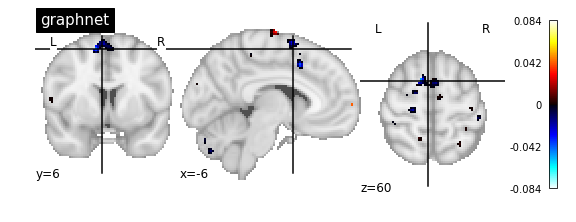

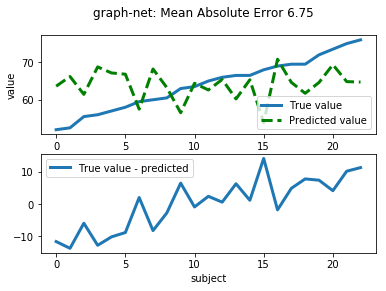

score Mvt MAIN- score BBT: -0.000173043181937 p 0.999374775575


In [15]:
from nilearn.plotting import plot_stat_map, show
from scipy import stats
plot_stat_map(decoder_g.coef_img_, title="graphnet", cut_coords=[-6, 6, 60])
y_pred=y_pred.ravel()
mse = np.mean(np.abs(suj_bbt - y_pred))
plot_pred(suj_bbt,y_pred, mse)

score,p=stats.pearsonr(suj_bbt,y_pred)
print('score Mvt MAIN- score BBT:',score,'p',p)

## Regression IRM Imagination Mvt Main & perf BBT (GraphNet)

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    decoder_g.fit(suj_filenames_mimag, suj_bbt)
    y_pred = cross_val_predict(decoder_g, suj_filenames_mimag, suj_bbt, cv=5)

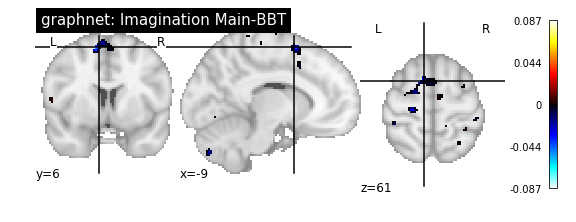

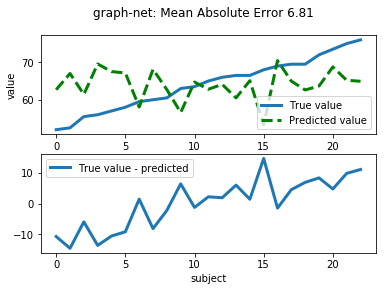

score Imagination Main-BBT: -0.0247253888437 p 0.910837066076


In [17]:
from nilearn.plotting import plot_stat_map, show
plot_stat_map(decoder_g.coef_img_, title="graphnet: Imagination Main-BBT")

y_pred=y_pred.ravel()
mse = np.mean(np.abs(suj_bbt - y_pred))
plot_pred(suj_bbt,y_pred, mse)
score,p=stats.pearsonr(suj_bbt,y_pred)
print('score Imagination Main-BBT:',score,'p',p)

## Regression IRM Imagination Mvt Main & score DeltaTUG (GraphNet)

In [18]:
from nilearn.decoding import SpaceNetRegressor
decoder_g = SpaceNetRegressor(mask=mask, penalty="graph-net",#"tv-l1"
                            #eps=1e-1,  # prefer large alphas
                            memory="nilearn_cache",verbose=0)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    decoder_g.fit(suj_filenames_mimag, suj_adtug)
    y_pred = cross_val_predict(decoder_g, suj_filenames_mimag, suj_adtug, cv=5)

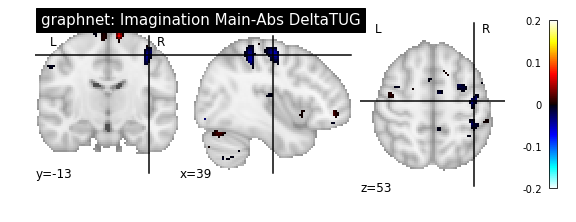

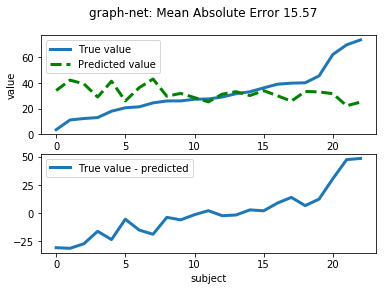

score Imagination Main-Abs DeltaTUG: -0.535926247117 p 0.00839281605045


In [19]:
from nilearn.plotting import plot_stat_map, show
plot_stat_map(decoder_g.coef_img_, title="graphnet: Imagination Main-Abs DeltaTUG")

y_pred=y_pred.ravel()
mse = np.mean(np.abs(suj_adtug - y_pred))
plot_pred(suj_adtug,y_pred, mse)
score,p=stats.pearsonr(suj_adtug,y_pred)
print('score Imagination Main-Abs DeltaTUG:',score,'p',p)

## Regression IRM Imagination Tout (main et pied) & score DeltaTUG (GraphNet)

In [20]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    decoder_g.fit(suj_filenames_imag, suj_adtug)
    y_pred = cross_val_predict(decoder_g, suj_filenames_imag, suj_adtug, cv=5)

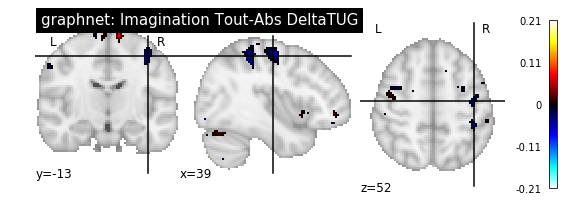

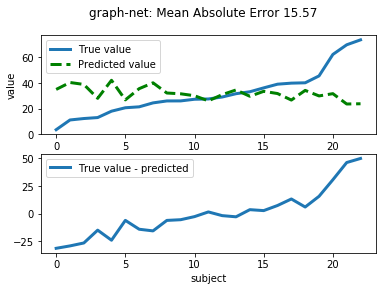

score Imagination Tout-Abs DeltaTUG: -0.583448678548 p 0.00347310723864


In [21]:
from nilearn.plotting import plot_stat_map, show
plot_stat_map(decoder_g.coef_img_, title="graphnet: Imagination Tout-Abs DeltaTUG")

y_pred=y_pred.ravel()
mse = np.mean(np.abs(suj_adtug - y_pred))
plot_pred(suj_adtug,y_pred, mse)
score,p=stats.pearsonr(suj_adtug,y_pred)
print('score Imagination Tout-Abs DeltaTUG:',score,'p',p)

## Imagination Marche -- Score DeltaTUG

In [22]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    decoder_g.fit(suj_filenames_pimag, suj_adtug)
    y_pred = cross_val_predict(decoder_g, suj_filenames_pimag, suj_adtug, cv=5)

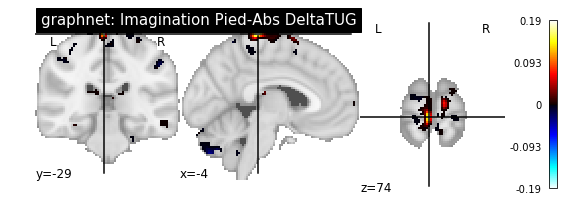

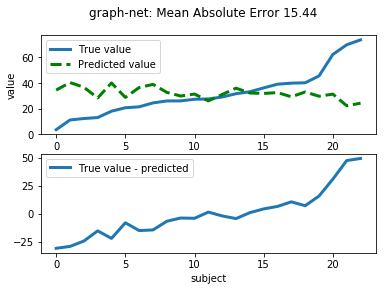

score Imagination Pied-Abs DeltaTUG: -0.62678447843 p 0.00137223526663


In [23]:
from nilearn.plotting import plot_stat_map, show
plot_stat_map(decoder_g.coef_img_, title="graphnet: Imagination Pied-Abs DeltaTUG")

y_pred=y_pred.ravel()
mse = np.mean(np.abs(suj_adtug - y_pred))
plot_pred(suj_adtug,y_pred, mse)
score,p=stats.pearsonr(suj_adtug,y_pred)
print('score Imagination Pied-Abs DeltaTUG:',score,'p',p)

## Imagination Marche -- Cadence Marche

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    decoder_g.fit(suj_filenames_pimag, suj_cad)
    y_pred = cross_val_predict(decoder_g, suj_filenames_pimag, suj_cad, cv=5)

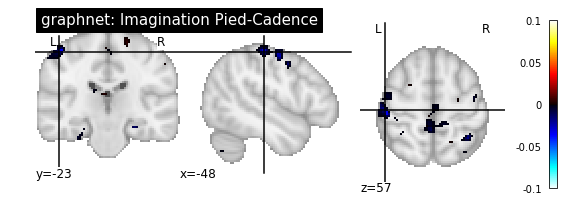

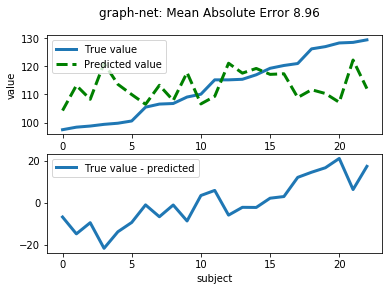

score Imagination Pied-SujCad: 0.197228623033 p 0.367039404249


In [25]:

from nilearn.plotting import plot_stat_map, show
plot_stat_map(decoder_g.coef_img_, title="graphnet: Imagination Pied-Cadence")
y_pred=y_pred.ravel()
mse = np.mean(np.abs(suj_cad - y_pred))
plot_pred(suj_cad,y_pred, mse)
score,p=stats.pearsonr(suj_cad,y_pred)
print('score Imagination Pied-SujCad:',score,'p',p)